In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.linalg import svd
import time
import cv2

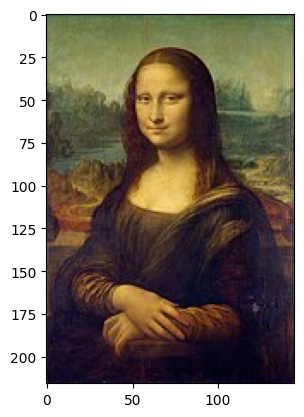

In [ ]:
image1 = plt.imread("Mona.jpg")
image2 = plt.imread("lajolla.jpg")
image3 = plt.imread("low.jpg")
plt.imshow(image1)

In [ ]:
def load_and_convert_image(im):
    try:
        image = cv2.imread(im)
        if image is None:
            raise Exception("Failed to load the image.")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return image
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

In [ ]:
def svd_reconstruct(im, k_values):
    try:
        U, S, V = np.linalg.svd(im)
        reconstructed_images = []
        for k in k_values:
            reconstructed_images.append(np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :])))
        return reconstructed_images
    except Exception as e:
        print(f"Error during SVD reconstruction: {str(e)}")
        return None

In [ ]:
def main():
    image = load_and_convert_image(img)
    k_values = [1,5,15,30,100]
    start_time = time.time()
    reconstructed_images = svd_reconstruct(image, k_values)
    end_time = time.time()
    # Display original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Python: Original Image')
    plt.axis('off')

    for i, k in enumerate(k_values):
        plt.subplot(2, 3, i + 2)
        plt.imshow(reconstructed_images[i], cmap='gray')
        plt.title(f'k = {k}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    # To get execution time
    execution_time = end_time - start_time
    print("execution time:")
    print(execution_time)

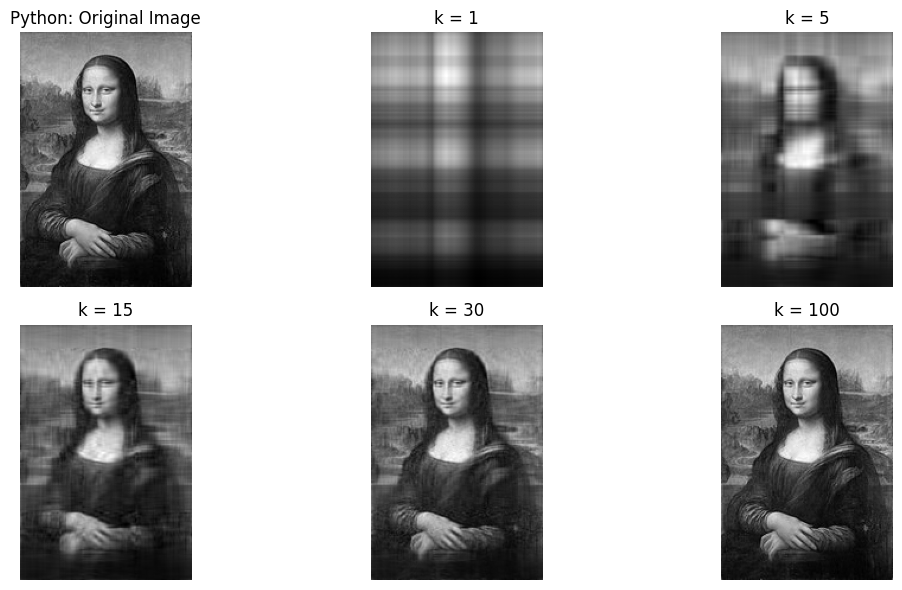

execution time:
0.01895928382873535


In [ ]:
img = "Mona.jpg"
if __name__ == "__main__":
    main()

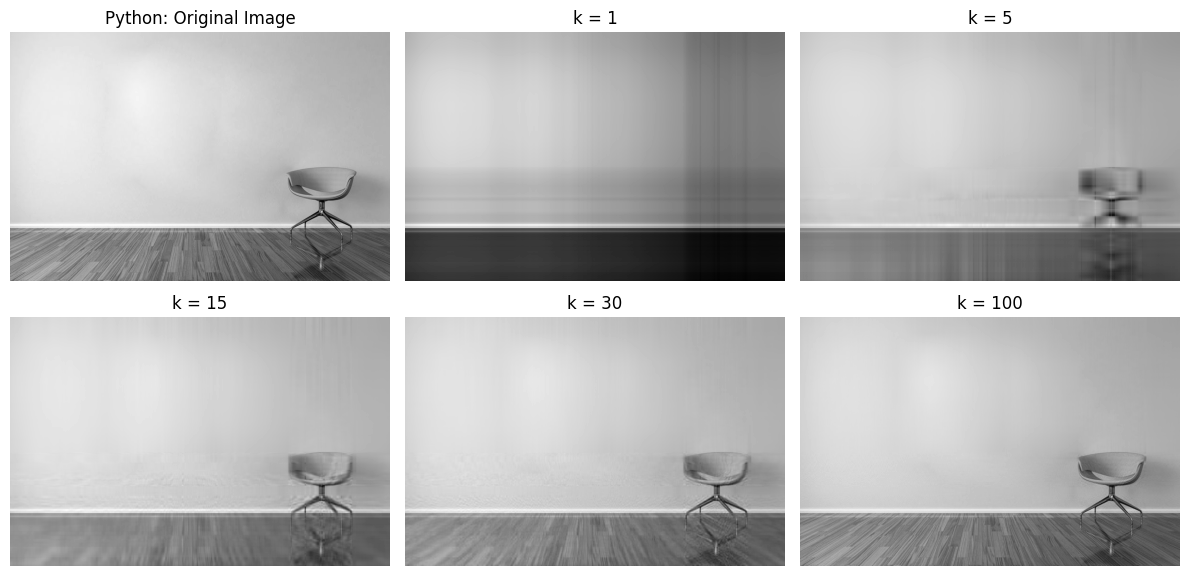

execution time:
0.216902494430542


In [ ]:
img = "low.jpg"
if __name__ == "__main__":
    main()

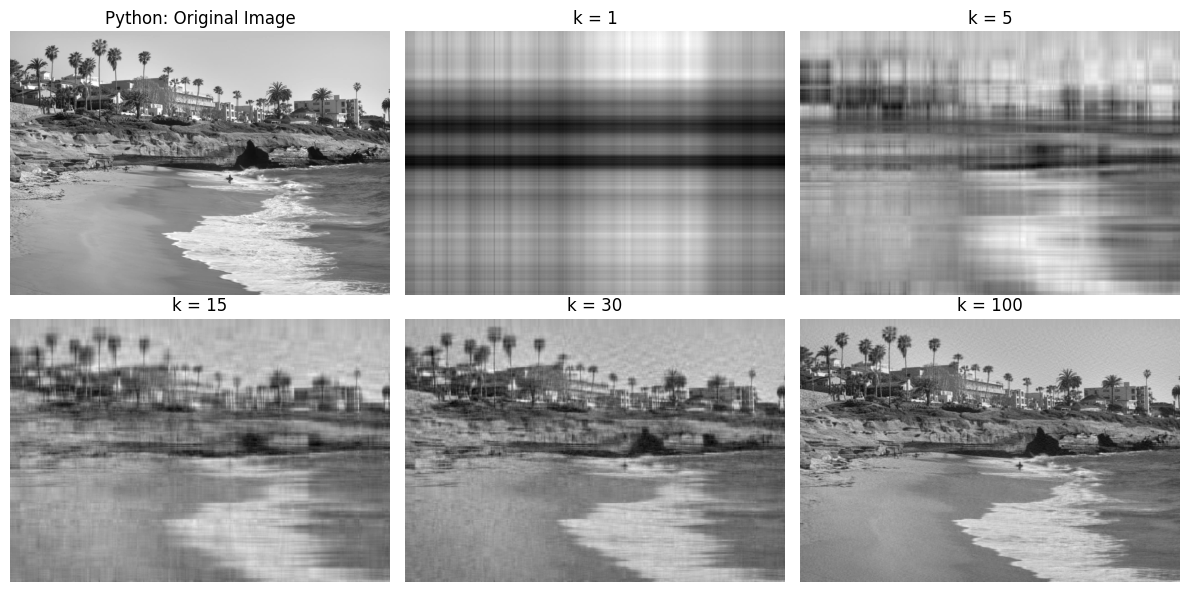

execution time:
1.2640647888183594


In [ ]:
img = "lajolla.jpg"
if __name__ == "__main__":
    main()

In [ ]:
categories = ['low_freq', 'high_freq', 'potrait']
# Time Vector
python_times = [0.049989938735961914, 0.23000168800354004, 0.009963274002075195]
matlab_times = [0.072351, 0.381132, 0.011181]

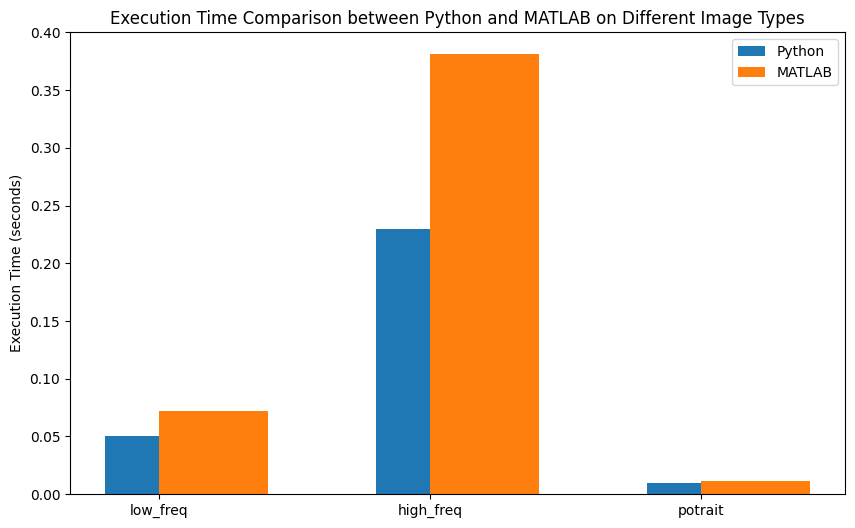

In [ ]:
# Plot the runtime
x = range(len(categories))
plt.figure(figsize=(10, 6))
plt.bar(x, python_times, width=0.4, label='Python', align='center')
plt.bar(x, matlab_times, width=0.4, label='MATLAB', align='edge')
plt.xticks(x, categories)
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison between Python and MATLAB on Different Image Types')
plt.legend()
plt.show()

In [27]:
k_values = [1,5,15,30,100]
# The time vector
python_times = [0.25020575523376465,0.2502439022064209,0.25999927520751953,0.22997546195983887,0.2500014305114746]  # Python
matlab_times = [0.372700,0.361039,0.349699,0.382094,0.399197]  # MATLAB

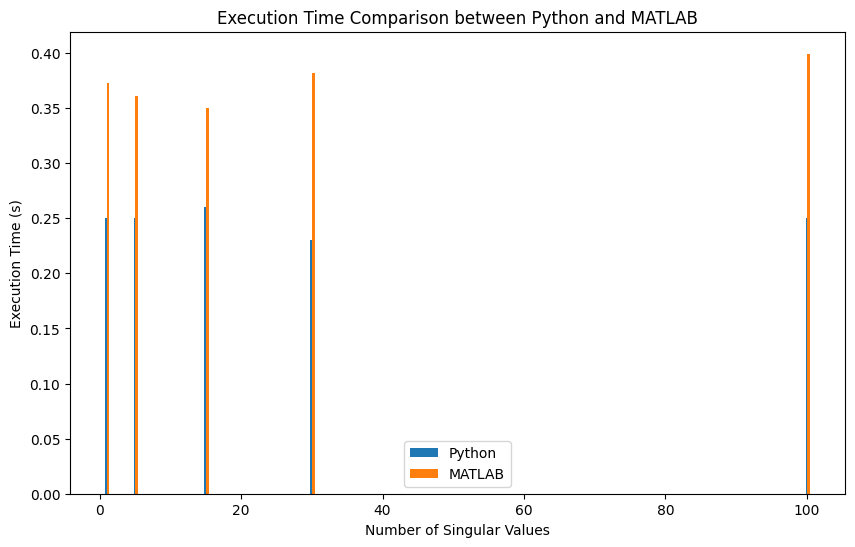

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(k_values, python_times, width=0.4, label='Python', align='center')
plt.bar(k_values, matlab_times, width=0.4, label='MATLAB', align='edge')
plt.xlabel('Number of Singular Values')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison between Python and MATLAB')
plt.legend()
plt.show()